# House price prediction with scikit-learn

TODO:

PCA/feature selection

Removing outliers

Streamlining analysis with scikit

Adding also tensorflow/keras


In [14]:
import os

In [15]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

print("os.environ.get('KAGGLE_URL_BASE') == ", os.environ.get('KAGGLE_URL_BASE'))
if 'kaggle' in os.environ.get('KAGGLE_URL_BASE','localhost'):
    print("We are running on a Kaggle Server")
    IN_KAGGLE = True
else:
    IN_KAGGLE = False

os.environ.get('KAGGLE_URL_BASE') ==  None


In [16]:
if(IN_KAGGLE):
    train_path='../input/house-prices-advanced-regression-techniques/train.csv'
    test_path='../input/house-prices-advanced-regression-techniques/test.csv'
else:
    train_path='data/train.csv'
    test_path='data/test.csv'

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns

ImportError: DLL load failed while importing _imaging: Impossibile trovare il modulo specificato.

In [ ]:
def plot_categorical(grouped,label,figsize=(12,8)):
    plt.figure(figsize=figsize)
    labels=[]
    data=[]
    for name,group in grouped:
        labels.append(name)
        data.append(group[label])
    plt.boxplot(data,labels=labels)
    plt.xlabel(name)
    plt.ylabel(label)
    plt.show()

Feature engineering function:

In [ ]:
from house_prices_script import feat_eng

# Real estate price prediction

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

Notes: lots of columns -> possible PCA? (see ml-basic-> clustering tutorial for info on PCA with sklearn)

In [ ]:
train,test=pd.read_csv(train_path),pd.read_csv(test_path)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
train,test=feat_eng(train),feat_eng(test)

In [ ]:
count=test.isna().sum()
count=pd.DataFrame(count)
count[count[0]!=0]

,0
MSZoning,4
LotFrontage,227
Alley,1352
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,16
MasVnrArea,15
BsmtQual,44
BsmtCond,45


In [ ]:
features=test.keys()


In [ ]:
len(features)

82

In [ ]:
label='SalePrice'

#### Plotting raw features

In [ ]:
plot=True


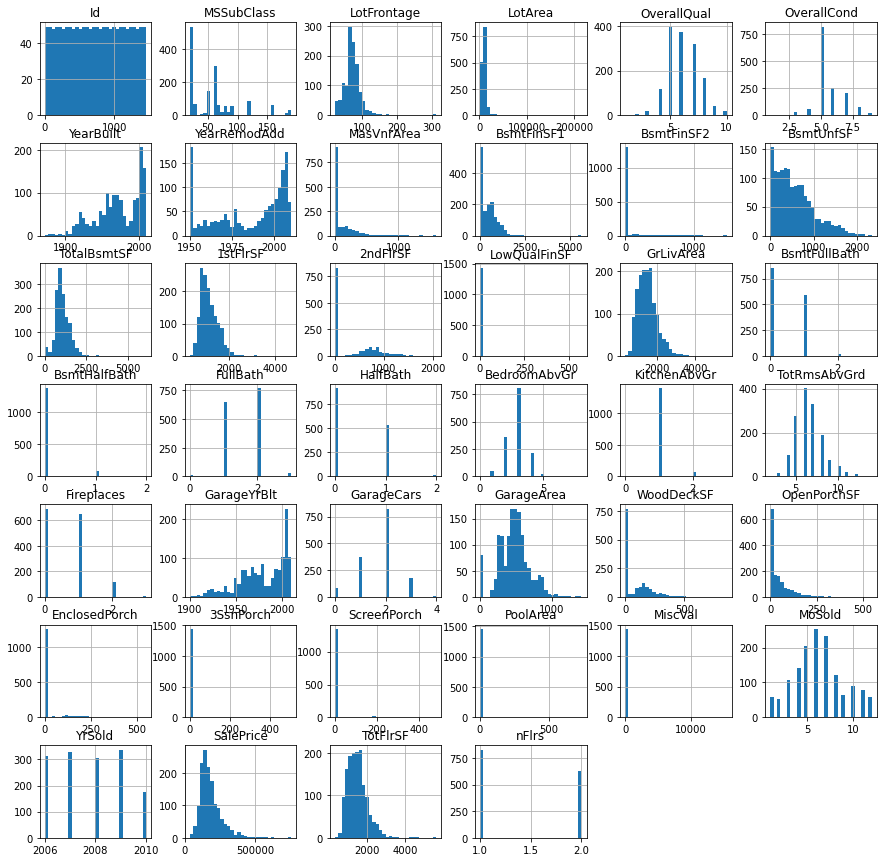

In [ ]:
train.hist(bins=30, figsize=(15,15))
plt.show()

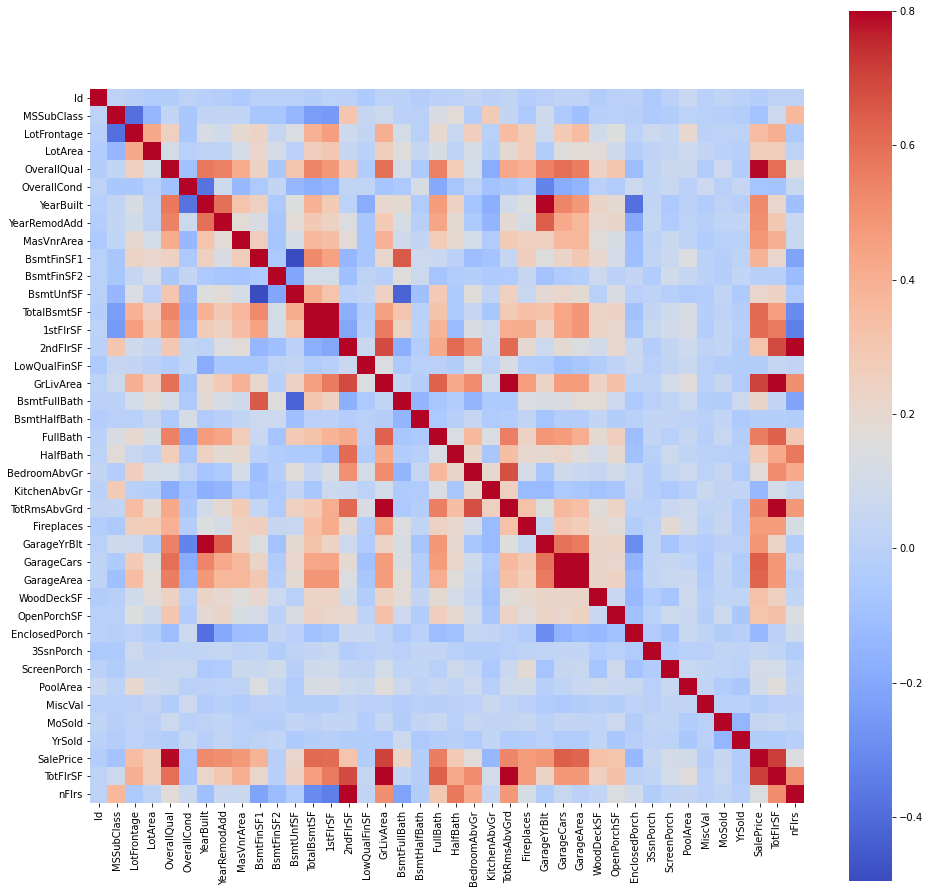

In [ ]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="coolwarm")
plt.show()

In [ ]:
def plot_synth_f(df:pd.DataFrame,plot_type='s',sf='synth',label='SalePrice'):
    #definition of synthetic feature here
    df[sf]=df['TotFlrSF']#how do I pass a function on the dataframe?
    if plot_type=='c':
        grouped=df.groupby(sf)
        plot_categorical(grouped)
    else:
        plt.scatter(df[sf],df[label])
        plt.xlabel(sf)
        plt.ylabel(label)
        z = np.polyfit(df[sf],df[label], 1)
        p = np.poly1d(z)
        plt.plot(df[sf],p(df[sf]), color='magenta')

Let's see if we can do some feature engineering.

First: find if there are nan entries:

In [ ]:
subset_df = test.loc[:, train.isnull().any()]

subset_df

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageYrBlt,GarageFinish,Fence,MiscFeature
0,80.0,NaN,None,0.0,TA,TA,No,Rec,LwQ,SBrkr,1961.0,Unf,MnPrv,NaN
1,81.0,NaN,BrkFace,108.0,TA,TA,No,ALQ,Unf,SBrkr,1958.0,Unf,NaN,Gar2
2,74.0,NaN,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,1997.0,Fin,MnPrv,NaN
3,78.0,NaN,BrkFace,20.0,TA,TA,No,GLQ,Unf,SBrkr,1998.0,Fin,NaN,NaN
4,43.0,NaN,None,0.0,Gd,TA,No,ALQ,Unf,SBrkr,1992.0,RFn,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,NaN,None,0.0,TA,TA,No,Unf,Unf,SBrkr,NaN,NaN,NaN,NaN
1455,21.0,NaN,None,0.0,TA,TA,No,Rec,Unf,SBrkr,1970.0,Unf,NaN,NaN
1456,160.0,NaN,None,0.0,TA,TA,No,ALQ,Unf,SBrkr,1960.0,Unf,NaN,NaN
1457,62.0,NaN,None,0.0,Gd,TA,Av,GLQ,Unf,SBrkr,NaN,NaN,MnPrv,Shed


In [ ]:
def count_na_per_col(df):
    count=df.isna().sum()
    count=pd.DataFrame(count).T
    return count

In [ ]:
count_na_per_col(train).append(count_na_per_col(test))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotFlrSF,nFlrs
0,0,0,0,259,0,0,1369,0,0,0,...,1179,1406,0,0,0,0,0,0.0,0,0
0,0,0,4,227,0,0,1352,0,0,2,...,1169,1408,0,0,0,1,0,NaN,0,0


#### Selecting the interesting features

In [ ]:
int_cat_f=['SaleCondition','TotRmsAbvGrd','ExterQual','Exterior1st','Neighborhood',
            'GarageFinish','KitchenQual','SaleType','PoolQC', 'OverallCond',
            'FullBath','HouseStyle','Condition1','MSZoning','BldgType','BsmtQual']
int_num_f=['LotArea','LotFrontage','BsmtFinSF1','TotalBsmtSF',
            'GrLivArea','GarageYrBlt','GarageArea','YearBuilt','MSSubClass']
int_ord_f=['GarageCars','OverallQual']

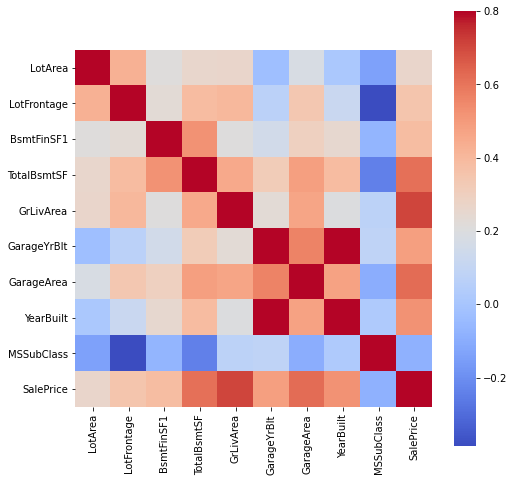

In [ ]:

corrmat = train[int_num_f+[label]].corr()
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="coolwarm")
plt.show()

## Beginning regressions

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import set_config
from sklearn.metrics import r2_score,make_scorer,mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
#try using keras model in scikit pipeline.. or just do it all in tensorflow/keras?
#from keras.wrappers.scikit_learn import KerasRegressor


In [ ]:
params = [{'regressor': [GradientBoostingRegressor()],
 'regressor__learning_rate': [0.03,0.1, 0.5, 1.0],
 'regressor__n_estimators' : [25,50, 100, 150,200]
 },
 {
    'regressor':[RandomForestRegressor()],
    'regressor__n_estimators' : [25,50, 100, 150,200]
 },
 {
   'regressor':[AdaBoostRegressor()],
   'regressor__learning_rate':[0.03,0.1, 0.5, 1.0],
   'regressor__n_estimators' : [25,50, 100, 150,200],
   'regressor__loss':['linear','square']
 },
 {
  'regressor':[XGBRegressor()],
  'regressor__gamma':[0,1,10,1000],
  'regressor__eta':[0.1,0.2,0.3,0.4],
 }
 ]

https://stackoverflow.com/questions/38555650/try-multiple-estimator-in-one-grid-search

In [ ]:
# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_transformer = Pipeline(steps=[
    ('inp',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

binned_transformer = Pipeline(steps=[('inp',SimpleImputer(strategy='median')),
                                    ('KBinsDiscretizer',KBinsDiscretizer(n_bins=10))])

ordinal_transformer = Pipeline(steps=[
    ('ordenc', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, int_num_f),
        ('cat', categorical_transformer, int_cat_f),
        ('ord', ordinal_transformer, int_ord_f)
        ])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])

In [ ]:

def pipeline_builder(n_cols,c_cols,o_cols,b_cols):
    numeric_transformer = Pipeline(steps=[
        ('inp',SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    binned_transformer = Pipeline(steps=[('inp',SimpleImputer(strategy='median')),
                                    ('KBinsDiscretizer',KBinsDiscretizer(n_bins=10))])
    ordinal_transformer = Pipeline(steps=[('onehot', OrdinalEncoder())])
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, n_cols),
        ('cat', categorical_transformer, c_cols),
        ('ord', ordinal_transformer, o_cols),
        ('bin',binned_transformer, b_cols)
        ])
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])
    pipeline
    return pipeline

In [ ]:
score = make_scorer(r2_score)

pipe=pipeline_builder(int_num_f,int_cat_f,int_ord_f,[])

gridsearch=GridSearchCV(verbose=1,estimator=pipe,param_grid=params,scoring=score,return_train_score=False,cv=3)


Create feature an label sets, drop outlier coumns

In [ ]:
def xy_split(df,label):
    x,y=df.drop(label,axis=1),df[label]
    return x,y

In [ ]:
x,y=train.drop([523,1298]).drop(label,axis=1),train.drop([523,1298])[label]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [ ]:
set_config(display='diagram')
gridsearch

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('inp',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['LotArea',
                                                                          'LotFrontage',
                                                                          'BsmtFinSF1',
                                                                          'TotalBsmtSF',
                                                                          'GrLivArea',
                                                                          'GarageYrBlt',
                                                                          'GarageArea',
                                                                          'YearBuilt',
                                                                          'MSSubClass']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder...
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...)],
                          'regressor__eta': [0.1, 0.2, 0.3, 0.4],
                          'regressor__gamma': [0, 1, 10, 1000]}],
             scoring=make_scorer(r2_score), verbose=1)

In [ ]:
model1=gridsearch.fit(x_train,(y_train))

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [ ]:
#model1.cv_results_

In [ ]:
model1.best_score_

0.8858532186436533

In [ ]:
model1.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('inp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea', 'LotFrontage',
                                                   'BsmtFinSF1', 'TotalBsmtSF',
                                                   'GrLivArea', 'GarageYrBlt',
                                                   'GarageArea', 'YearBuilt',
                                                   'MSSubClass']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))])...
                                                   'Exterior1st',
                                                   'Neighborhood',
                                                   'GarageFinish',
                                                   'KitchenQual', 'SaleType',
                                                   'PoolQC', 'OverallCond',
                                                   'FullBath', 'HouseStyle',
                                                   'Condition1', 'MSZoning',
                                                   'BldgType', 'BsmtQual']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['GarageCars',
                                                   'OverallQual'])])),
                ('regressor', GradientBoostingRegressor(n_estimators=150))])

In [ ]:
import datetime

In [ ]:
savemodel=True

In [ ]:
if savemodel:
    timestamp=datetime.datetime.now().strftime("%d%m%Y%H%M%S")
    models_folder= 'models'
    os.makedirs(models_folder,exist_ok=True)
    model_name= 'model_'+ timestamp +'.joblib'
    modelpath= os.path.join(models_folder,model_name)
    from joblib import dump, load
    dump(model1, modelpath)
    print('Saved ' , modelpath)

Saved  models\model_28112022151950.joblib


In [ ]:
def score_and_visualize(model,x_test,y_test):
    predictions=model.predict(x_test)
    plt.figure(figsize=(10,10))
    plt.scatter(y_test,predictions)
    plt.xlabel('True')
    plt.ylabel('Predicted')
    msle=mean_squared_log_error(y_true=y_test, y_pred=predictions)#msle is the metric evaluated in the kaggle challange
    r2=r2_score(y_true=y_test, y_pred=predictions)
    print('r2 coefficient: ',r2,'\nmsle = ', msle)
    z = np.polyfit(y_test, predictions, 1)
    p = np.poly1d(z)
    plt.plot(y_test,p(y_test), color='magenta')
    plt.axline((0,0),slope=1,ls='--')
    plt.show()

In [ ]:
#len(model2[1].feature_importances_)

r2 coefficient:  0.9211901267539976 
msle =  0.014547988890817647


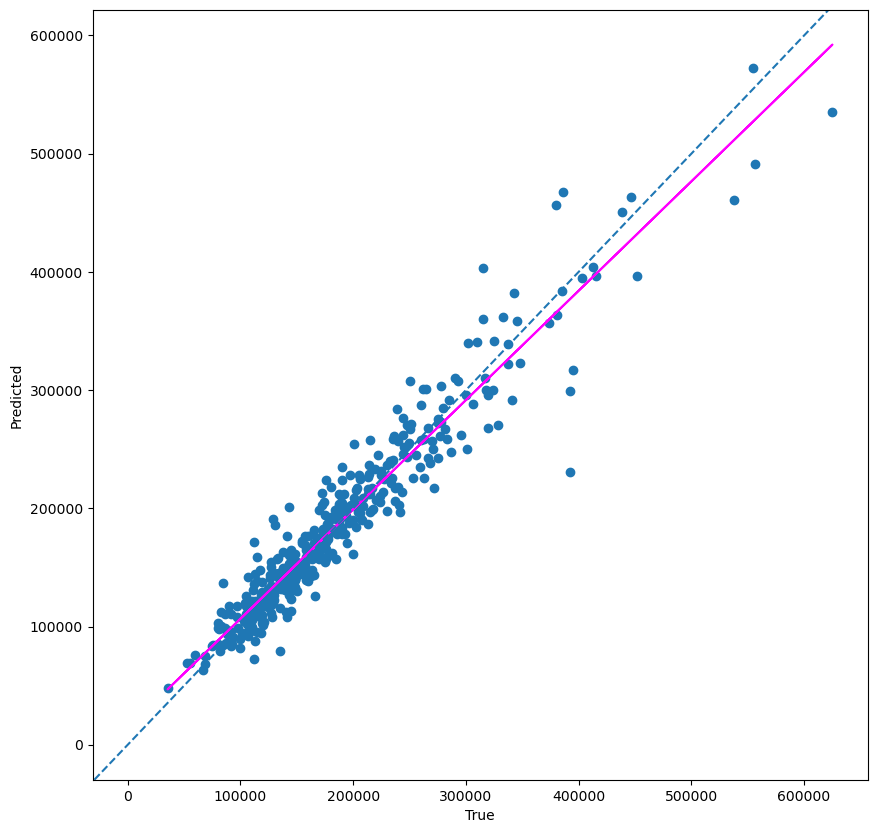

In [ ]:
score_and_visualize(model=model1,x_test=x_test,y_test=y_test)
#score_and_visualize(model=model2,x_test=x_test,y_test=y_test)

## Now make predictions on the test dataset

In [ ]:
sample_sub=pd.read_csv('sample_submission.csv')
sample_sub

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


### Make prediction and save

In [ ]:
#make prediction on the test set and save
pred=model1.predict(test)


In [ ]:
write=True

In [ ]:
out_df=pd.read_csv('sample_submission.csv')
out_df['SalePrice']=pred
if write:
    out_df.to_csv('prediction.csv',index=False)